<a href="https://www.kaggle.com/code/mashallandme/digit-recognizer-using-tensorflow?scriptVersionId=188429779" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# import packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import polars as pl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2024-07-15 18:50:53.079285: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 18:50:53.079418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 18:50:53.251424: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
#Load data
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
print("training data shape: "+str(df_train.shape))
print("test data shape: "+str(df_test.shape))

training data shape: (42000, 785)
test data shape: (28000, 784)


In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Reshape datasets and rescale pixel values
X_train= df_train.drop('label',axis=1)
y_train = df_train.iloc[:,0].to_numpy()
X_train = X_train/255.0
X_test = df_test/255.0
X_train = np.reshape(X_train.to_numpy(),(42000,28,28))
X_test = np.reshape(X_test.to_numpy(),(28000,28,28))

In [7]:
#Build a tensorflow sequential model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),#image size
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),#drop out rate usually set between 0.2 and 0.5
  tf.keras.layers.Dense(10) #output has 10 categories, not using softmax activation here for stability of loss function
])

In [8]:
#Define loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
#Fit model
model.fit(X_train, y_train, epochs=8)

Epoch 1/8
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8587 - loss: 0.4833
Epoch 2/8
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9575 - loss: 0.1409
Epoch 3/8
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9704 - loss: 0.0947
Epoch 4/8
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9775 - loss: 0.0719
Epoch 5/8
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9815 - loss: 0.0575
Epoch 6/8
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9843 - loss: 0.0470
Epoch 7/8
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9871 - loss: 0.0402
Epoch 8/8
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9886 - loss: 0.0340


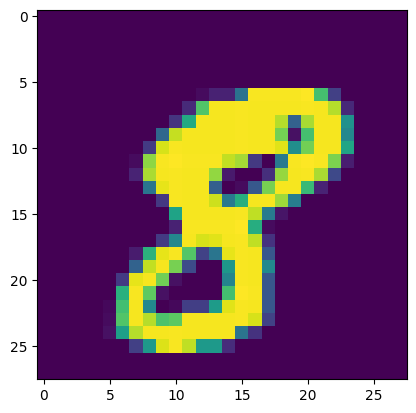

In [10]:
#Visualize one impage
plt.imshow(X_train[10])

In [11]:
#check the model result
predictions = model(X_train[10:11]).numpy() # logit( or log odds) of each class
pred_probs = tf.nn.softmax(predictions).numpy()
pred_probs #probability of each class

array([[1.03324727e-09, 1.43083534e-09, 4.31606821e-08, 1.22050515e-05,
        1.96357944e-10, 2.63657398e-06, 4.14651403e-11, 3.73852282e-09,
        9.99940872e-01, 4.42699820e-05]], dtype=float32)

In [12]:
tf.argmax(pred_probs, axis=1).numpy()#the class with the largest probability

array([8])

In [13]:
#Make prediction for the test data
y_test = model.predict(X_test, verbose=2)
y_pred = tf.argmax(y_test, axis=1)
submission = pl.DataFrame([
    pl.Series('ImageId', range(1, len(y_pred)+1)),
    pl.Series('Label', y_pred.numpy())
])

875/875 - 1s - 2ms/step


In [14]:
#Generate submission file
submission.write_csv('submission.csv')